In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../../data/csv/anime_data.csv")

In [5]:
df

,Unnamed: 0,title,genre,episodes,popularity,score
0,0,"""0""",['Music'],1.0,7345.0,4.77
1,1,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",['Kids'],1.0,12413.0,5.61
2,2,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","['Comedy', 'Fantasy', 'School']",1.0,3466.0,6.96
3,3,"""Bungaku Shoujo"" Memoire","['Drama', 'Romance', 'School']",3.0,2943.0,7.40
4,4,"""Bungaku Shoujo"" Movie","['Mystery', 'Drama', 'Romance', 'School']",1.0,1799.0,7.48
...,...,...,...,...,...,...
15868,15868,xxxHOLiC Rou,"['Mystery', 'Supernatural']",2.0,1869.0,8.21
15869,15869,xxxHOLiC Shunmuki,"['Mystery', 'Comedy', 'Psychological', 'Supern...",2.0,1813.0,8.13
15870,15870,Üks Uks,['Dementia'],1.0,14107.0,5.71
15871,15871,ēlDLIVE,"['Action', 'Sci-Fi', 'Space', 'Police', 'Shoun...",12.0,2260.0,6.23


In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
df_new = df[df["episodes"] != "Not specified"]

In [8]:
df_new

,title,genre,episodes,popularity,score
0,"""0""",['Music'],1.0,7345.0,4.77
1,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",['Kids'],1.0,12413.0,5.61
2,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","['Comedy', 'Fantasy', 'School']",1.0,3466.0,6.96
3,"""Bungaku Shoujo"" Memoire","['Drama', 'Romance', 'School']",3.0,2943.0,7.40
4,"""Bungaku Shoujo"" Movie","['Mystery', 'Drama', 'Romance', 'School']",1.0,1799.0,7.48
...,...,...,...,...,...
15868,xxxHOLiC Rou,"['Mystery', 'Supernatural']",2.0,1869.0,8.21
15869,xxxHOLiC Shunmuki,"['Mystery', 'Comedy', 'Psychological', 'Supern...",2.0,1813.0,8.13
15870,Üks Uks,['Dementia'],1.0,14107.0,5.71
15871,ēlDLIVE,"['Action', 'Sci-Fi', 'Space', 'Police', 'Shoun...",12.0,2260.0,6.23


In [9]:
import pandas as pd
import ast

# Convert 'genre' to a list
df_new['genre'] = df_new['genre'].apply(ast.literal_eval)

# Explode the DataFrame
df_exploded = df_new.explode('genre')

In [10]:
# Define the genres and their corresponding broad categories
genre_categories = {
    'Action and Adventure': ['Action', 'Adventure', 'Super Power', 'Martial Arts', 'Samurai', 'Military'],
    'Fantasy and Supernatural': ['Fantasy', 'Supernatural', 'Magic', 'Vampire', 'Demons'],
    'Science Fiction and Technology': ['Sci-Fi', 'Mecha', 'Space', 'Cars'],
    'Comedy and Slice of Life': ['Comedy', 'Slice of Life', 'Parody'],
    'Drama and Romance': ['Drama', 'Romance', 'Shoujo', 'Shounen Ai', 'Josei', 'Shoujo Ai', 'Yaoi'],
    'Horror and Thriller': ['Horror', 'Thriller', 'Psychological', 'Mystery'],
    'Historical and Cultural': ['Historical', 'Samurai', 'Seinen'],
    'Youth and School Life': ['School', 'Shounen', 'Kids', 'Shoujo'],
    'Special Interests': ['Ecchi', 'Harem', 'Hentai', 'Yaoi', 'Yuri'],
    'Miscellaneous': ['Music', 'Sports', 'Game', 'Police', 'Dementia']
}

# Function to map each genre to its broader category
def map_genre_to_category(genre):
    for category, genres in genre_categories.items():
        if genre in genres:
            return category
    return 'Miscellaneous'

# Map each genre to its broader category
df_exploded['category'] = df_exploded['genre'].apply(map_genre_to_category)

In [11]:
df_exploded['title'] = df_exploded['title'].str.replace(r"[^\w\s]", '', regex=True)


In [12]:
df_exploded = df_exploded.groupby(["category", "title"], as_index=False)[["popularity", "score"]].mean()

In [13]:
# Group by genre and sort
top_score = df_exploded.groupby('category', as_index=False).apply(lambda x: x.nlargest(10, 'score'))
top_popularity = df_exploded.groupby('category', as_index=False).apply(lambda x: x.nlargest(10, 'popularity'))

In [14]:
top_score.reset_index(drop=True, inplace=True)

In [15]:
top_score_final = top_score.groupby(["category", "title"], as_index=False)["score"].mean()

In [16]:
top_score_final

,category,title,score
0,Action and Adventure,Code Geass Hangyaku no Lelouch R2,8.93
1,Action and Adventure,Fullmetal Alchemist Brotherhood,9.23
2,Action and Adventure,Ginga Eiyuu Densetsu,9.03
3,Action and Adventure,Gintama,9.00
4,Action and Adventure,Gintama Enchousen,8.98
...,...,...,...
95,Youth and School Life,Hunter x Hunter 2011,9.11
96,Youth and School Life,Kimi no Na wa,9.09
97,Youth and School Life,Koe no Katachi,9.01
98,Youth and School Life,Quiz de Manabu Pinocchio no Koutsuu Ansen,9.08


In [16]:
top_popularity.reset_index(drop=True, inplace=True)

In [17]:
top_popularity_final = top_popularity.groupby(["category", "title"], as_index=False)["popularity"].mean()

In [18]:
top_popularity_final

,category,title,popularity
0,Action and Adventure,Boy General,16308.0
1,Action and Adventure,Jumbagi Hanbandoui gongryong 3D,16238.0
2,Action and Adventure,Mabeob Chunjamun Season 2,16305.0
3,Action and Adventure,Miniforce,16166.0
4,Action and Adventure,Ninja Tamamaru no Hi no Youjin,16225.0
...,...,...,...
95,Youth and School Life,Robot Trains,16315.0
96,Youth and School Life,Usagi no Mofy TV 2014,16317.0
97,Youth and School Life,Usagi no Mofy TV 2016,16319.0
98,Youth and School Life,Watashi no Ningyou,16310.0


In [25]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot
fig = make_subplots()

# Group data by category
categories = top_score_final['category'].unique()

# Add a trace for each anime title, making bars horizontal
# Start with the first category visible
first = True
for category in categories:
    category_df = top_score_final[top_score_final['category'] == category]
    category_df.sort_values(by='score', inplace=True)
    fig.add_trace(
        go.Bar(y=category_df['title'], x=category_df['score'], name=category, 
               orientation='h', visible=first, marker_color='#df6200')  # Set bar color to crimson
    )
    first = False  # Set the rest of the categories to invisible

# Create a dropdown menu
buttons = []
for i, category in enumerate(categories):
    button = dict(
        label=category,
        method="update",
        args=[{"visible": [i == j for j in range(len(categories))]},  # Only the selected category is visible
              {"title": f"Top Anime by for Genre: {category}"}])
    buttons.append(button)

# Update layout for dropdown, axes, and xaxis range
fig.update_layout(
    updatemenus=[dict(
        active=0,  # First category is active
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.77,
        xanchor="left",
        y=1.25,
        yanchor="top"
    )],
    title="Top Rated Anime by Genre: Action and Adventure",
    xaxis_title="Score",
    yaxis_title="Title",
    xaxis=dict(range=[8, 10])  # Set the range for x-axis
)
fig.write_html("../../data/plots/top_animes_score.html")
# Show the plot
fig.show()


In [86]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot
fig = make_subplots()

# Group data by category
categories = top_popularity_final['category'].unique()

# Add a trace for each anime title, making bars horizontal
# Start with the first category visible
first = True
for category in categories:
    category_df = top_popularity_final[top_popularity_final['category'] == category]
    category_df.sort_values(by='popularity', inplace=True)
    fig.add_trace(
        go.Bar(y=category_df['title'], x=category_df['popularity'], name=category, 
               orientation='h', visible=first, marker_color='#ccb716')  # Set bar color to crimson
    )
    first = False  # Set the rest of the categories to invisible

# Create a dropdown menu
buttons = []
for i, category in enumerate(categories):
    button = dict(
        label=category,
        method="update",
        args=[{"visible": [i == j for j in range(len(categories))]},  # Only the selected category is visible
              {"title": f"Most Popular Anime by Genre: {category}"}])
    buttons.append(button)

# Update layout for dropdown, axes, and xaxis range
fig.update_layout(
    updatemenus=[dict(
        active=0,  # First category is active
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.77,
        xanchor="left",
        y=1.25,
        yanchor="top"
    )],
    title="Most Popular Anime by Genre: Action and Adventure",
    title_x=0.5,
    xaxis_title="Score",
    yaxis_title="Title",
    xaxis=dict(range=[13500, 16500])  # Set the range for x-axis
)

fig.write_html("../../data/plots/top_animes_popularity.html")

# Show the plot
fig.show()


In [98]:
suggested_anime = pd.read_csv("../../data/csv/top20_animes_with_scores.csv")


In [99]:
suggested_anime

,anime_name,japanese_title,count,matched_score
0,Steins Gate,Steins;Gate,19606,9.11
1,Attack on Titan,Shingeki no Kyojin,16722,8.47
2,One Piece,Wan Pisu,10936,8.53
3,Violet Evergarden,Vaioretto Evagaden,8780,8.62
4,Made in Abyss,Meido in Abisu,8558,8.83
5,Monster,Monsuta,8543,8.69
6,Clannad,Kuranado,7461,8.16
7,Zero,Zero,6724,5.98
8,Death Note,Desu Noto,6559,8.65
9,Code Geass,Code Geass,6169,7.49


In [113]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df = suggested_anime.nlargest(10, 'count')

# Number of variables
num_vars = len(df['anime_name'])

# Compute angle for each bar
angles = np.linspace(0, 360, num_vars, endpoint=False).tolist()

# Create Plotly Figure
fig = go.Figure()

# Add bars
for angle, value, score, name in zip(angles, df['count'], df['matched_score'], df['japanese_title']):
    fig.add_trace(go.Barpolar(
        r=[value],
        theta=[angle],
        width=18,
        name=name,
        marker_color='#dc8d23',
        # opacity=0.5,
        text=f"{score:.2f}",
        hoverinfo="name+text"
    ))

# Update the layout to set background color to white
fig.update_layout(
    title='Most Suggested Anime on Reddit',
    title_x=0.5,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df['count'])],
            gridcolor='#648b9b'  # Make radial gridlines transparent
        ),
        angularaxis=dict(
            tickvals=angles,
            ticktext=df['japanese_title'],
            gridcolor='rgba(0,0,0,0)'  # Make angular gridlines transparent
        ),
        radialaxis_linecolor='gray',
        angularaxis_linecolor='gray',
    ),
    paper_bgcolor='white',  # Set the background color of the paper to white
    plot_bgcolor='rgba(0,0,0,0)', 
    showlegend=False,
    width=800,
    height=800
)

# Set the color of the polar background to white
fig.update_polars(bgcolor='white')

#write to html
fig.write_html("../../data/plots/top_anime_suggested.html")

# Show the plot
fig.show()


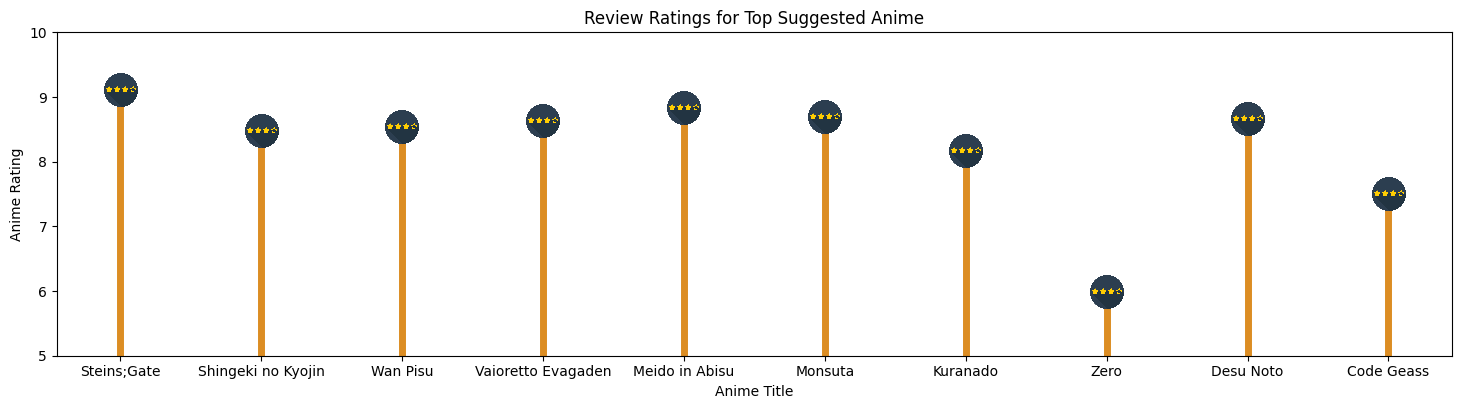

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Sample data - replace with your actual data
data = suggested_anime.nlargest(10, 'count')
df = data.sort_values(by='count', ascending=False)

# Load movie icon
icon_path = 'review-icon.png'  # Path to your icon image
movie_icon = Image.open(icon_path)
imagebox = OffsetImage(movie_icon, zoom=0.03)  # Adjust the zoom level

# Creating the lollipop plot
fig, ax = plt.subplots(figsize=(18, 4.2))  # Adjust the size as needed

# Add lines (sticks) for each lollipop
for title, rating in zip(df['japanese_title'], df['matched_score']):
    ax.plot([title, title], [5, rating], color='#dc8d23', linewidth=5)

# Add custom icons as lollipop heads
for title, rating in zip(df['japanese_title'], df['matched_score']):
    ab = AnnotationBbox(imagebox, (title, rating), frameon=False)
    ax.add_artist(ab)

# Customize the layout
ax.set_title('Review Ratings for Top Suggested Anime')
ax.set_xlabel('Anime Title')
ax.set_ylabel('Anime Rating')
ax.set_ylim(5, 10)
ax.set_facecolor('white')
ax.grid(False)

#save the plot
plt.savefig('../../data/plots/review_rating_of_top_anime.png', dpi =300)

# Show the plot
plt.show()


In [101]:
suggested_anime

,anime_name,japanese_title,count,matched_score
0,Steins Gate,Steins;Gate,19606,9.11
1,Attack on Titan,Shingeki no Kyojin,16722,8.47
2,One Piece,Wan Pisu,10936,8.53
3,Violet Evergarden,Vaioretto Evagaden,8780,8.62
4,Made in Abyss,Meido in Abisu,8558,8.83
5,Monster,Monsuta,8543,8.69
6,Clannad,Kuranado,7461,8.16
7,Zero,Zero,6724,5.98
8,Death Note,Desu Noto,6559,8.65
9,Code Geass,Code Geass,6169,7.49


In [17]:
top_score_final

,category,title,score
0,Action and Adventure,Code Geass Hangyaku no Lelouch R2,8.93
1,Action and Adventure,Fullmetal Alchemist Brotherhood,9.23
2,Action and Adventure,Ginga Eiyuu Densetsu,9.03
3,Action and Adventure,Gintama,9.00
4,Action and Adventure,Gintama Enchousen,8.98
...,...,...,...
95,Youth and School Life,Hunter x Hunter 2011,9.11
96,Youth and School Life,Kimi no Na wa,9.09
97,Youth and School Life,Koe no Katachi,9.01
98,Youth and School Life,Quiz de Manabu Pinocchio no Koutsuu Ansen,9.08


In [18]:
# Group by 'title' and aggregate the 'category' values into a list
grouped_top_score_final = top_score_final.groupby('title').agg({'category': list, 'score': 'first'}).reset_index()

# Rename the 'category' column to 'Categories_list'
grouped_top_score_final = grouped_top_score_final.rename(columns={'category': 'Genre','title': 'Title','score': 'Score'})

# Display the result
top_10_score_grouped = grouped_top_score_final.sort_values(by='Score', ascending=False).head(10)
top_10_score_grouped

,Title,Genre,Score
6,Fullmetal Alchemist Brotherhood,"[Action and Adventure, Comedy and Slice of Lif...",9.23
18,Hunter x Hunter 2011,"[Action and Adventure, Fantasy and Supernatura...",9.11
47,SteinsGate,"[Horror and Thriller, Science Fiction and Tech...",9.11
23,Kimi no Na wa,"[Drama and Romance, Fantasy and Supernatural, ...",9.09
37,Quiz de Manabu Pinocchio no Koutsuu Ansen,[Youth and School Life],9.08
41,Shingeki no Kyojin Season 3 Part 2,"[Action and Adventure, Drama and Romance, Fant...",9.07
7,Ginga Eiyuu Densetsu,"[Action and Adventure, Drama and Romance, Scie...",9.03
0,3gatsu no Lion 2nd Season,"[Comedy and Slice of Life, Drama and Romance, ...",9.02
25,Koe no Katachi,"[Drama and Romance, Youth and School Life]",9.01
8,Gintama,"[Action and Adventure, Comedy and Slice of Lif...",9.00


In [24]:
import plotly.express as px

# Sort the DataFrame by 'Score' column in descending order
top_10_score_grouped = top_10_score_grouped.sort_values(by='Score', ascending=True)

# Define your custom color scale
custom_color_scale = [
    [0.0, '#ffba9d'],
    [0.5, '#ff8659'],
    [1.0, '#ff4301']
]

fig = px.bar(
    top_10_score_grouped,
    x="Score",
    y="Title",
    color="Score",
    text="Title: " +top_10_score_grouped["Title"] + "<br>Score: " + top_10_score_grouped["Score"].astype(str),  # Include both Title and Score in text
    hover_data={'Title':False, 
                'Score':False, 
                'Genre':True,},
    orientation="h" , # Set orientation to horizontal
    color_continuous_scale=custom_color_scale  
)

fig.update_layout(
    title="Top rated anime movies across all genre",
    xaxis_title="Score",  # Remove x-axis title
    yaxis_title="",  # Remove y-axis title
    xaxis_showticklabels=True,  # Hide x-axis tick labels
    yaxis_showticklabels=False,  # Hide y-axis tick labels
    showlegend=True,
    plot_bgcolor='white',   barmode='stack',  # Set bar mode to stack
    height=600,  # Increase the height of the plot 
    xaxis=dict(range=[8.5, 9.3])  
)
#save the plot
fig.write_html('../../data/plots/top_rated_anime_all_genre.html')

fig.show()